### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 

#### The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

 
### Business Goal 
Require to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Solution is divided into following steps
1. Data loading and Exploration
2. Data Inspection and Missing Value Imputation
3. EDA
4. Train-Test Split
5. Scaling and Modelling
6. Regularization with Ridge and Lasso
7. Model Evaluation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import os


# hide warnings
import warnings
warnings.filterwarnings('ignore')




## 1. Data loading and Exploration

In [2]:
df=pd.read_csv('train.csv')
print(df.shape)
df.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Identifiying null features from dataset

df.isnull().sum()/len(df.index)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [5]:
df.columns[df.isnull().any()]
df_null=df.isnull().sum()/len(df.index)*100
df_null=df_null[df_null>0]
df_null

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## 2. Data Inspection and Missing Value Imputation

In [7]:
#Imputing missing values of categorical featured 
t=["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in t:
    df[i].fillna("Not Available", inplace=True)


In [8]:
df.columns[df.isnull().any()]
df_null=df.isnull().sum()/len(df.index)*100
df_null=df_null[df_null>0]
df_null

LotFrontage    17.739726
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64

In [9]:
#Imputing missing values of numerical features
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [10]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

In [11]:
print(df['MasVnrArea'].value_counts())
print(df['MasVnrArea'].describe())

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [12]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [13]:
print(df['GarageYrBlt'].value_counts())
print(df['GarageYrBlt'].describe())


2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


In [14]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)

In [15]:
print(df['Electrical'].value_counts())
print(df['Electrical'].describe())
#There is only one null field in electical so checking the value counts to identify max value

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


In [16]:
df['Electrical'].fillna('SBrkr',inplace=True)

In [17]:
df.columns[df.isnull().any()]
df_null=df.isnull().sum()/len(df.index)*100
df_null=df_null[df_null>0]
df_null
#Imputation of null values are completed

Series([], dtype: float64)

In [18]:
df['Age_Prop']=df.YrSold-df.YearBuilt
df.head()

#Based built year and sold year of that property/house we can identify age of property

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0   1          60       RL         65.0     8450   Pave  Not Available   
1   2          20       RL         80.0     9600   Pave  Not Available   
2   3          60       RL         68.0    11250   Pave  Not Available   
3   4          70       RL         60.0     9550   Pave  Not Available   
4   5          60       RL         84.0    14260   Pave  Not Available   

  LotShape LandContour Utilities  ...         PoolQC          Fence  \
0      Reg         Lvl    AllPub  ...  Not Available  Not Available   
1      Reg         Lvl    AllPub  ...  Not Available  Not Available   
2      IR1         Lvl    AllPub  ...  Not Available  Not Available   
3      IR1         Lvl    AllPub  ...  Not Available  Not Available   
4      IR1         Lvl    AllPub  ...  Not Available  Not Available   

     MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  \
0  Not Available       0      2   2008       WD         Normal     208500   
1  Not Available       0      5   2007       WD         Normal     181500   
2  Not Available       0      9   2008       WD         Normal     223500   
3  Not Available       0      2   2006       WD        Abnorml     140000   
4  Not Available       0     12   2008       WD         Normal     250000   

   Age_Prop  
0         5  
1        31  
2         7  
3        91  
4         8  

[5 rows x 82 columns]

In [19]:
df=df.drop(['YrSold','YearBuilt','MoSold','YearRemodAdd'],axis=1)
df.shape
#added age_prop feature based on YrSold and YearBuilt, removing features related to the age_prop feature

(1460, 78)

In [20]:
df=df.drop('Id',axis=1)
df.head()
#Id is serial number removing that feature

MSSubClass MSZoning  LotFrontage  LotArea Street          Alley LotShape  \
0          60       RL         65.0     8450   Pave  Not Available      Reg   
1          20       RL         80.0     9600   Pave  Not Available      Reg   
2          60       RL         68.0    11250   Pave  Not Available      IR1   
3          70       RL         60.0     9550   Pave  Not Available      IR1   
4          60       RL         84.0    14260   Pave  Not Available      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea         PoolQC  \
0         Lvl    AllPub    Inside  ...           0        0  Not Available   
1         Lvl    AllPub       FR2  ...           0        0  Not Available   
2         Lvl    AllPub    Inside  ...           0        0  Not Available   
3         Lvl    AllPub    Corner  ...           0        0  Not Available   
4         Lvl    AllPub       FR2  ...           0        0  Not Available   

           Fence    MiscFeature MiscVal  SaleType  SaleCondition SalePrice  \
0  Not Available  Not Available       0        WD         Normal    208500   
1  Not Available  Not Available       0        WD         Normal    181500   
2  Not Available  Not Available       0        WD         Normal    223500   
3  Not Available  Not Available       0        WD        Abnorml    140000   
4  Not Available  Not Available       0        WD         Normal    250000   

  Age_Prop  
0        5  
1       31  
2        7  
3       91  
4        8  

[5 rows x 77 columns]

## 3. EDA

In [21]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageArea  \
0         706           0        150          856  ...         548   
1         978           0        284         1262  ...         460   
2         486           0        434          920  ...         608   
3         216           0        540          756  ...         642   
4         655           0        490         1145  ...         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  Age_Prop  
0        0     208500         5  
1        0     181500        31  
2        0     223500         7  
3        0     140000        91  
4        0     250000         8  

[5 rows x 34 columns]

#### Outlier Treatment
Identifying the outliers

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

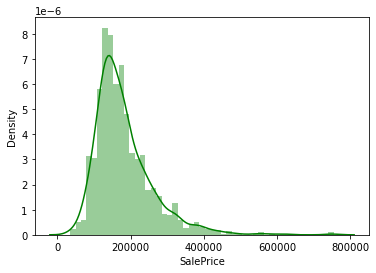

In [22]:
sns.distplot(df.SalePrice, color='g')

In [23]:
(df.select_dtypes(include=['float64', 'int64'])).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age_Prop'],
      dtype='object')

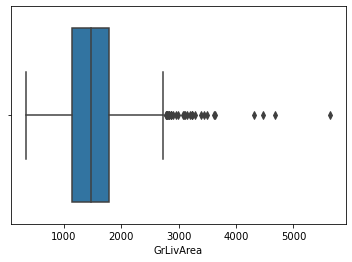

In [24]:
sns.boxplot(df.GrLivArea)
plt.show()

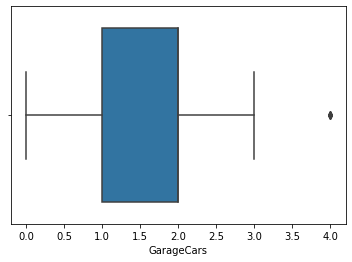

In [25]:
sns.boxplot(df.GarageCars)
plt.show()

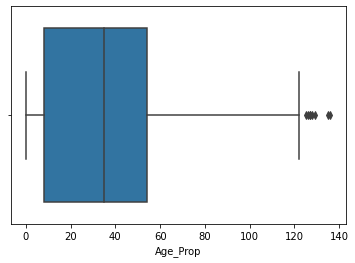

In [26]:
sns.boxplot(df.Age_Prop)
plt.show()

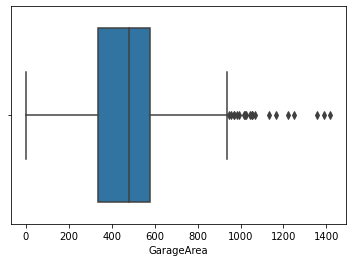

In [27]:
sns.boxplot(df.GarageArea)
plt.show()

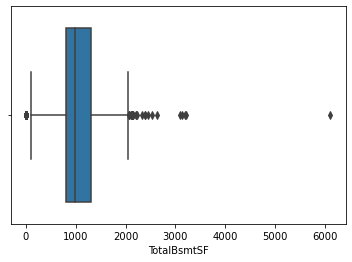

In [28]:
sns.boxplot(df.TotalBsmtSF)
plt.show()

In [29]:
#From above plots, we conclude that outlier exist in dataset
#Outlier_Removal based on IQR
col=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','MasVnrArea', 'BsmtFinSF1', 
     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
     'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
     'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
     '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice','Age_Prop']

Q1=df[col].quantile(0.05)
Q3=df[col].quantile(0.97)

IQR=Q3-Q1

Otlier = pd.DataFrame(index=col)
Otlier.rows = col
Otlier['Q1'] = Q1
Otlier['Q3'] = Q3
Otlier['IQR'] = IQR
Otlier['LT'] = Q1 - 1.5 * IQR
Otlier['GT'] = Q3 + 1.5 * IQR
pd.set_option('display.max_rows', None)
Otlier.head(50)

df=df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
df.shape

(1379, 77)

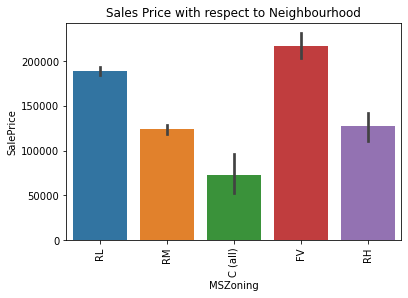

In [31]:
sns.barplot(x="MSZoning", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

##Conclusion: Salesprice is high for Floating Village Residential type of zoning classification

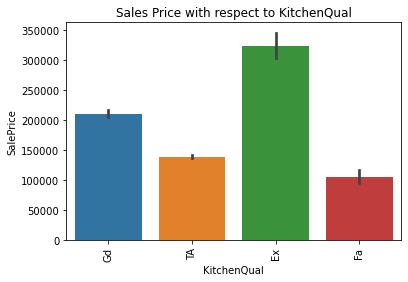

In [32]:

sns.barplot(x="KitchenQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to KitchenQual")
plt.xticks(rotation=90)
plt.show()

##Conclusion: Salesprice is high for excellent quality of Kitchen

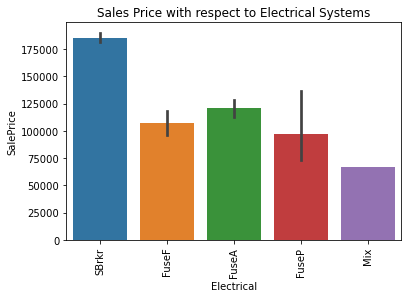

In [33]:
sns.barplot(x="Electrical", y="SalePrice", data= df)
plt.title("Sales Price with respect to Electrical Systems")
plt.xticks(rotation=90)
plt.show()

##Conclusion: Salesprice is high for SBrkr electric system

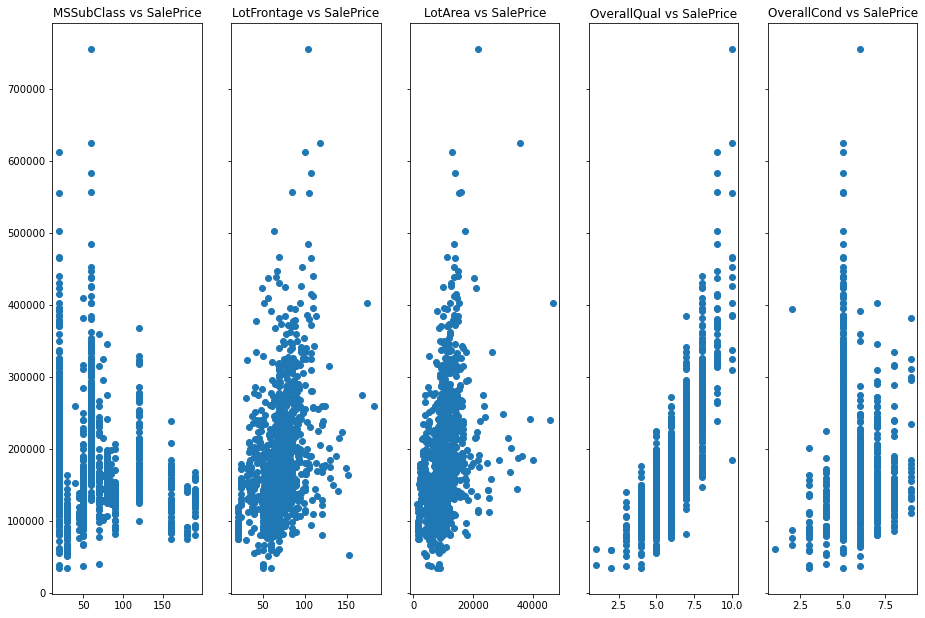

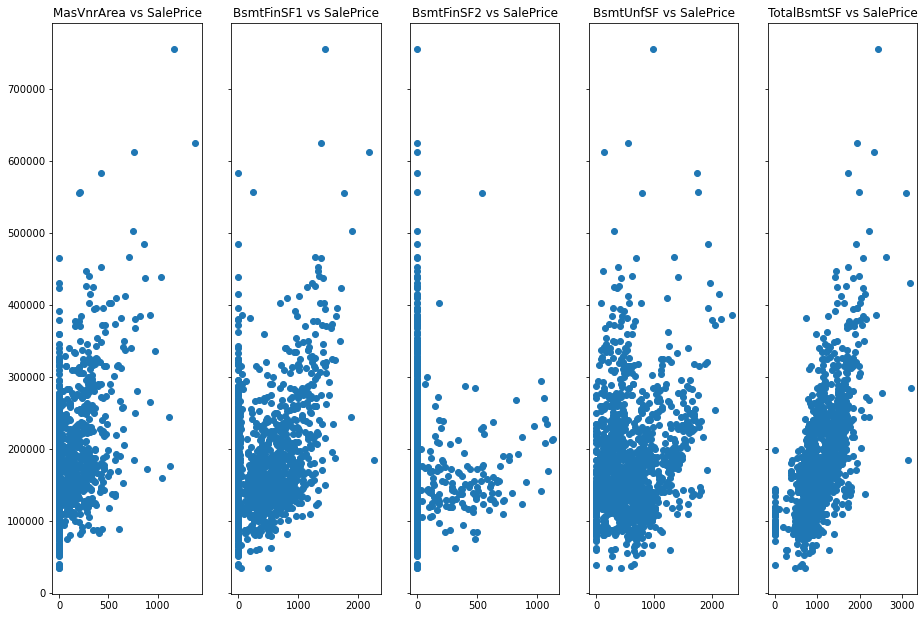

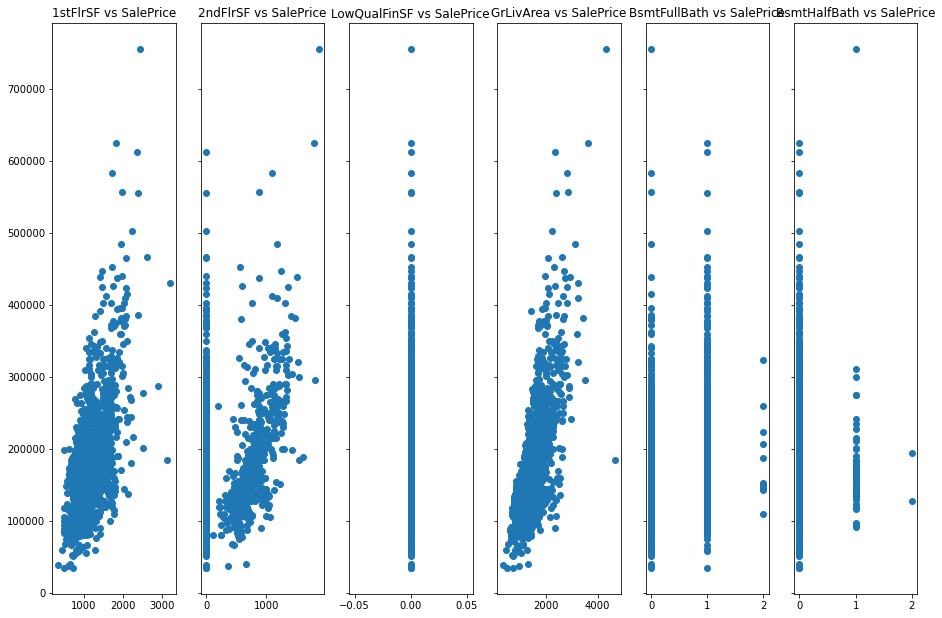

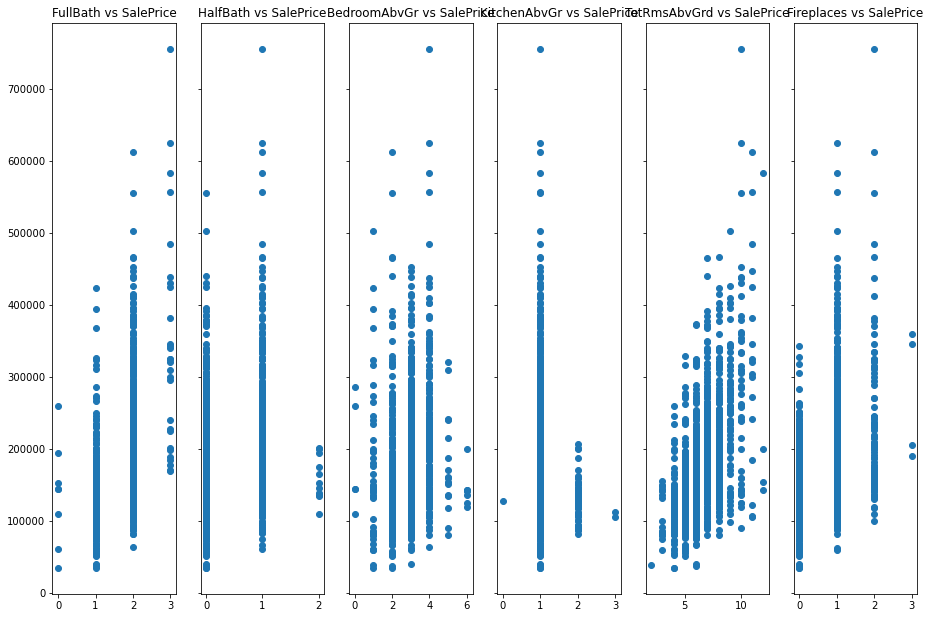

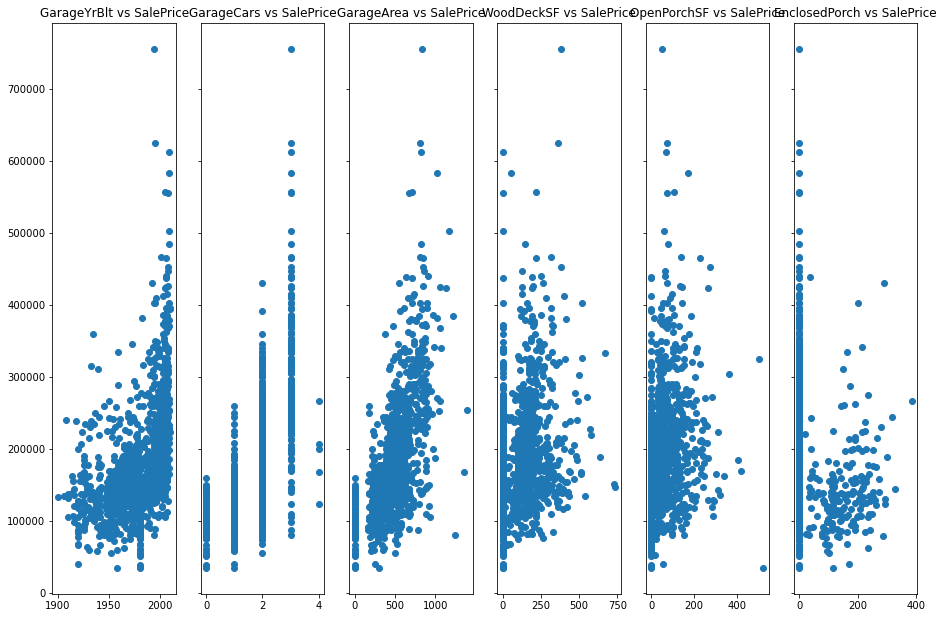

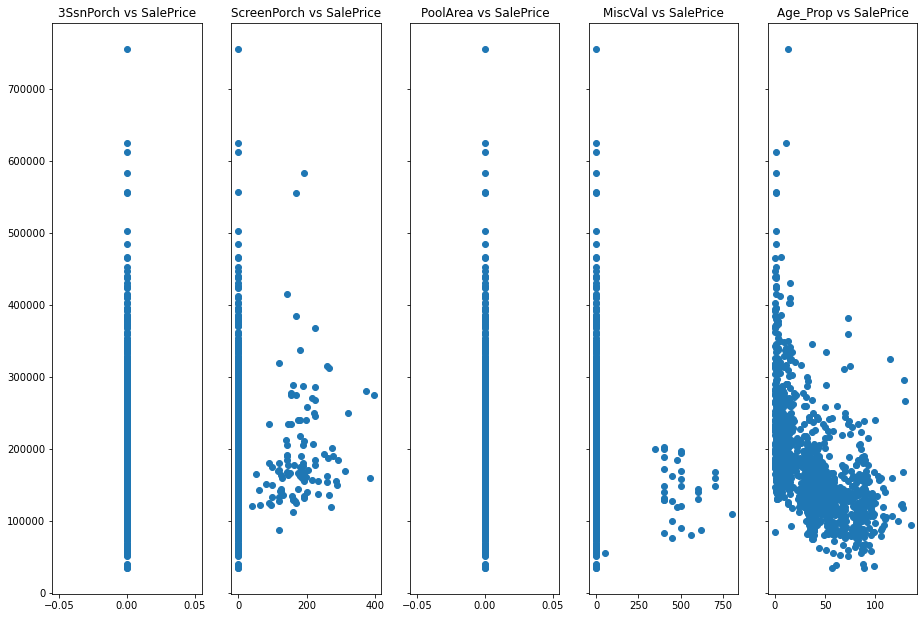

In [34]:
#Checking trends of numerical featured with respect to sales price

def print_plt(l):
    fig, ax = plt.subplots(ncols=len(l), sharey=True)
    for i in range(len(l)):
        t= ax[i].scatter(df[l[i]], df['SalePrice'])
        t.set_label(l[i])
        ax[i].set_title(l[i] +' vs SalePrice')
    
    fig.set_size_inches(15.5, 10.5, forward=True)
    

l=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
print_plt(l)
    
l=['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
print_plt(l)

l=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath']
print_plt(l)

l=['FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
print_plt(l)

l=['GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']
print_plt(l)

l=['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age_Prop']
print_plt(l)


#Conclusion:
#1. Based on Lot Area, Garage area SalePrice increases
#2. Based on overall quality i.e. material used and finishing of the house Sale price increases
#3. Type I, Type 2 finishig and unfishing of basement areas Sale price is increased
#4. Sale price is increasing based on area of first and second floor
#5. As property getting old, sale price is decreasing
#6. Pool area, low quality finishing and 3 season porch area are not availble in many of the houses



plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [35]:
#Checking for features having 0 values for whole dataset, as it is not impacting sale price
df.PoolArea.describe()

count    1379.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64

In [36]:
df['3SsnPorch'].describe()

count    1379.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: 3SsnPorch, dtype: float64

In [37]:
df.LowQualFinSF.describe()

count    1379.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: LowQualFinSF, dtype: float64

In [38]:
#All above 3 features are having unique values i.e 0, we are removing these 3 featurs

df=df.drop(['PoolArea','3SsnPorch','LowQualFinSF'],axis=1)
df.shape

(1379, 74)

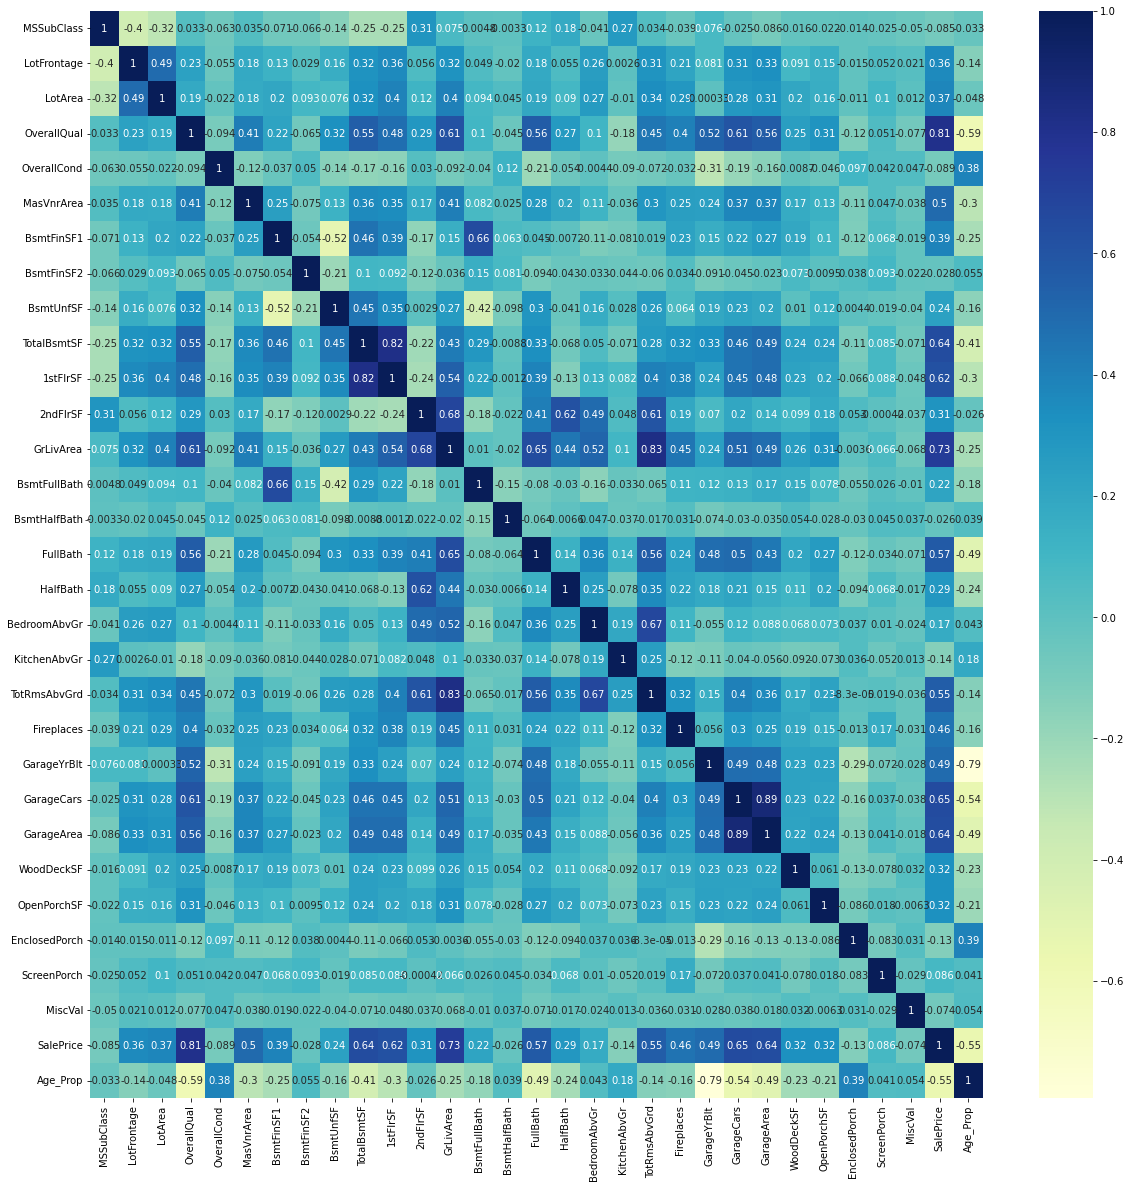

In [39]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
corrmat = df.corr()
corrmat

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.397252 -0.315954     0.032972    -0.062794   
LotFrontage     -0.397252     1.000000  0.490619     0.231929    -0.054617   
LotArea         -0.315954     0.490619  1.000000     0.185480    -0.022114   
OverallQual      0.032972     0.231929  0.185480     1.000000    -0.093819   
OverallCond     -0.062794    -0.054617 -0.022114    -0.093819     1.000000   
MasVnrArea       0.034623     0.184578  0.177356     0.414172    -0.123132   
BsmtFinSF1      -0.070673     0.131491  0.200033     0.218215    -0.037279   
BsmtFinSF2      -0.066034     0.028970  0.093403    -0.064870     0.050209   
BsmtUnfSF       -0.144874     0.157965  0.075889     0.321634    -0.144064   
TotalBsmtSF     -0.253400     0.316573  0.324355     0.546279    -0.173862   
1stFlrSF        -0.253103     0.359209  0.396715     0.477106    -0.157403   
2ndFlrSF         0.306562     0.055664  0.117404     0.290078     0.029990   
GrLivArea        0.075345     0.318319  0.400021     0.610095    -0.092362   
BsmtFullBath     0.004821     0.049406  0.094096     0.099843    -0.040352   
BsmtHalfBath    -0.003293    -0.019799  0.045384    -0.044838     0.117918   
FullBath         0.124267     0.183113  0.194270     0.561732    -0.206579   
HalfBath         0.179728     0.054878  0.089967     0.272199    -0.053795   
BedroomAbvGr    -0.040914     0.256859  0.270199     0.104644    -0.004415   
KitchenAbvGr     0.274171     0.002629 -0.010007    -0.184337    -0.089939   
TotRmsAbvGrd     0.034085     0.307548  0.337760     0.445211    -0.071930   
Fireplaces      -0.038722     0.212084  0.286655     0.399371    -0.031891   
GarageYrBlt      0.076452     0.080523  0.000331     0.524323    -0.309969   
GarageCars      -0.025356     0.306995  0.282991     0.607589    -0.192698   
GarageArea      -0.086181     0.332072  0.305574     0.564253    -0.155571   
WoodDeckSF      -0.016258     0.090884  0.197148     0.245137    -0.008726   
OpenPorchSF     -0.022150     0.145901  0.157134     0.313385    -0.046193   
EnclosedPorch   -0.014173    -0.015117 -0.011126    -0.117803     0.096566   
ScreenPorch     -0.024988     0.052414  0.100433     0.050957     0.041896   
MiscVal         -0.050472     0.021305  0.011745    -0.076924     0.047115   
SalePrice       -0.084582     0.357973  0.374178     0.805085    -0.088782   
Age_Prop        -0.033327    -0.141558 -0.048033    -0.588164     0.384734   

               MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass       0.034623   -0.070673   -0.066034  -0.144874    -0.253400   
LotFrontage      0.184578    0.131491    0.028970   0.157965     0.316573   
LotArea          0.177356    0.200033    0.093403   0.075889     0.324355   
OverallQual      0.414172    0.218215   -0.064870   0.321634     0.546279   
OverallCond     -0.123132   -0.037279    0.050209  -0.144064    -0.173862   
MasVnrArea       1.000000    0.246147   -0.075070   0.125523     0.361636   
BsmtFinSF1       0.246147    1.000000   -0.054427  -0.520850     0.461188   
BsmtFinSF2      -0.075070   -0.054427    1.000000  -0.205665     0.101716   
BsmtUnfSF        0.125523   -0.520850   -0.205665   1.000000     0.450866   
TotalBsmtSF      0.361636    0.461188    0.101716   0.450866     1.000000   
1stFlrSF         0.345797    0.393160    0.091776   0.350766     0.818470   
2ndFlrSF         0.174690   -0.169726   -0.121158   0.002868    -0.219109   
GrLivArea        0.411377    0.148538   -0.035983   0.266222     0.425530   
BsmtFullBath     0.082194    0.656040    0.149222  -0.420621     0.288080   
BsmtHalfBath     0.024619    0.063294    0.080617  -0.098204    -0.008802   
FullBath         0.277114    0.045292   -0.093967   0.301863     0.334453   
HalfBath         0.196680   -0.007195   -0.042788  -0.041148    -0.067683   
BedroomAbvGr     0.111946   -0.108820   -0.032810   0.163781     0.049741   
KitchenAbvGr    -0.035938   -0.081376   -0.043715   0.0

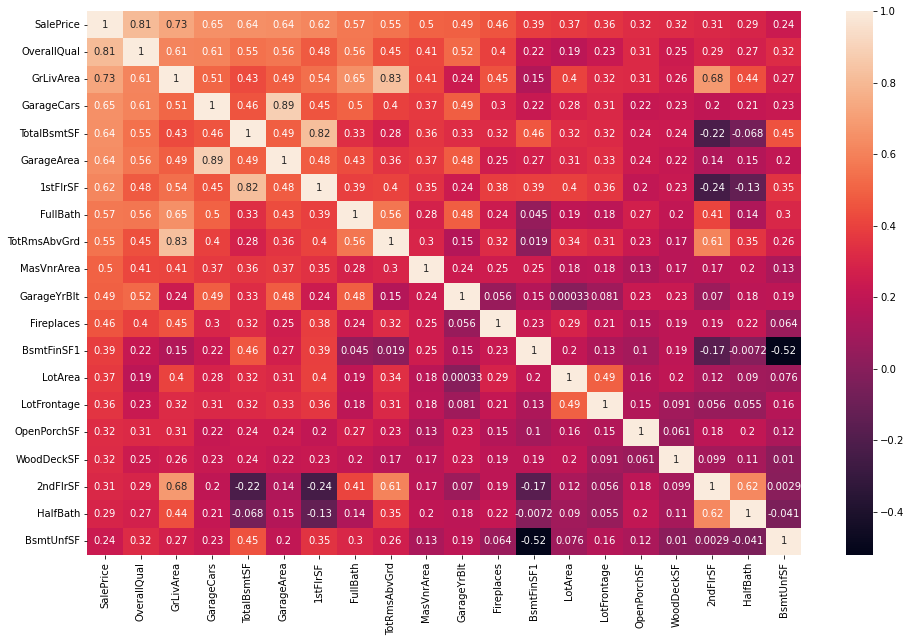

In [41]:
plt.figure(figsize = (16, 10))
n = 20 # number of variables which have the highest correlation with 'Sales price'

corrmat = df.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index

sns.heatmap(df[cols].corr(),annot=True)
plt.show()

In [42]:
cotegorical_var=df.select_dtypes(include='object')
cotegorical_var

MSZoning Street          Alley LotShape LandContour Utilities LotConfig  \
0          RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
1          RL   Pave  Not Available      Reg         Lvl    AllPub       FR2   
2          RL   Pave  Not Available      IR1         Lvl    AllPub    Inside   
3          RL   Pave  Not Available      IR1         Lvl    AllPub    Corner   
4          RL   Pave  Not Available      IR1         Lvl    AllPub       FR2   
6          RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
7          RL   Pave  Not Available      IR1         Lvl    AllPub    Corner   
8          RM   Pave  Not Available      Reg         Lvl    AllPub    Inside   
9          RL   Pave  Not Available      Reg         Lvl    AllPub    Corner   
10         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
11         RL   Pave  Not Available      IR1         Lvl    AllPub    Inside   
12         RL   Pave  Not Available      IR2         Lvl    AllPub    Inside   
13         RL   Pave  Not Available      IR1         Lvl    AllPub    Inside   
14         RL   Pave  Not Available      IR1         Lvl    AllPub    Corner   
15         RM   Pave  Not Available      Reg         Lvl    AllPub    Corner   
16         RL   Pave  Not Available      IR1         Lvl    AllPub   CulDSac   
17         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
18         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
19         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
20         RL   Pave  Not Available      IR1         Lvl    AllPub    Corner   
21         RM   Pave           Grvl      Reg         Bnk    AllPub    Inside   
22         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
23         RM   Pave  Not Available      Reg         Lvl    AllPub    Inside   
24         RL   Pave  Not Available      IR1         Lvl    AllPub    Inside   
25         RL   Pave  Not Available      Reg         Lvl    AllPub    Corner   
26         RL   Pave  Not Available      Reg         Lvl    AllPub    Corner   
27         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
28         RL   Pave  Not Available      IR1         Lvl    AllPub   CulDSac   
29         RM   Pave  Not Available      IR1         Lvl    AllPub    Inside   
30    C (all)   Pave           Pave      Reg         Lvl    AllPub    Inside   
31         RL   Pave  Not Available      IR1         Lvl    AllPub   CulDSac   
32         RL   Pave  Not Available      Reg         Lvl    AllPub    Corner   
33         RL   Pave  Not Available      IR1         Lvl    AllPub    Inside   
34         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
35         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
36         RL   Pave  Not Available      Reg         Lvl    AllPub    Corner   
37         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
38         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
39         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
40         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
41         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
42         RL   Pave  Not Available      IR1         Lvl    AllPub   CulDSac   
43         RL   Pave  Not Available      IR1         Lvl    AllPub   CulDSac   
44         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
45         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
46         RL   Pave  Not Available      IR1         Lvl    AllPub   CulDSac   
47         FV   Pave  Not Available      Reg         Lvl    AllPub    Inside   
48         RM   Pave  Not Available      Reg         Lvl    AllPub    Inside   
49         RL   Pave  Not Available      Reg         Lvl    AllPub    Inside   
50   

In [43]:
df=pd.get_dummies(df,drop_first=True)
df.head()
#conveting categorical variables woth dummies

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0         706           0        150          856  ...               0   
1         978           0        284         1262  ...               0   
2         486           0        434          920  ...               0   
3         216           0        540          756  ...               0   
4         655           0        490         1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 246 columns]

## 4. Train-Test Split

In [44]:
y = df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [45]:
X = df
X.shape

(1379, 245)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.30, random_state=42)


In [47]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
493           20         70.0     7931            5            6         0.0   
1037          60         69.0     9240            8            5       396.0   
1197          75         65.0     8850            7            6         0.0   
963           20        122.0    11923            9            5         0.0   
540           20         85.0    14601            9            5       584.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
493          374         532        363         1269  ...               0   
1037           0           0       1055         1055  ...               0   
1197           0           0        815          815  ...               0   
963            0           0       1800         1800  ...               0   
540         1260           0        578         1838  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
493                0             0             0            1   
1037               0             0             0            1   
1197               1             0             0            0   
963                0             0             0            1   
540                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
493                       0                     0                     0   
1037                      0                     0                     0   
1197                      0                     0                     0   
963                       0                     0                     0   
540                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
493                      1                      0  
1037                     1                      0  
1197                     1                      0  
963                      1                      0  
540                      1                      0  

[5 rows x 245 columns]

In [48]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (965, 245)
X_test shape (414, 245)
y_train shape (965,)
y_test shape (414,)


In [49]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
493           20         70.0     7931            5            6         0.0   
1037          60         69.0     9240            8            5       396.0   
1197          75         65.0     8850            7            6         0.0   
963           20        122.0    11923            9            5         0.0   
540           20         85.0    14601            9            5       584.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
493          374         532        363         1269  ...               0   
1037           0           0       1055         1055  ...               0   
1197           0           0        815          815  ...               0   
963            0           0       1800         1800  ...               0   
540         1260           0        578         1838  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
493                0             0             0            1   
1037               0             0             0            1   
1197               1             0             0            0   
963                0             0             0            1   
540                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
493                       0                     0                     0   
1037                      0                     0                     0   
1197                      0                     0                     0   
963                       0                     0                     0   
540                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
493                      1                      0  
1037                     1                      0  
1197                     1                      0  
963                      1                      0  
540                      1                      0  

[5 rows x 245 columns]

In [50]:
y_train.head()

493     155000
1037    287000
1197    144000
963     239000
540     315000
Name: SalePrice, dtype: int64

In [51]:
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'Age_Prop'],
      dtype='object')

In [52]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'Age_Prop']
X_train[num_vars].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
493           20         70.0     7931            5            6         0.0   
1037          60         69.0     9240            8            5       396.0   
1197          75         65.0     8850            7            6         0.0   
963           20        122.0    11923            9            5         0.0   
540           20         85.0    14601            9            5       584.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  Fireplaces  \
493          374         532        363         1269  ...           1   
1037           0           0       1055         1055  ...           1   
1197           0           0        815          815  ...           1   
963            0           0       1800         1800  ...           0   
540         1260           0        578         1838  ...           1   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
493        1964.0           1         308           0            0   
1037       2001.0           2         905           0           45   
1197       1916.0           1         225           0            0   
963        2007.0           2         702         288          136   
540        2006.0           3         765         270           68   

      EnclosedPorch  ScreenPorch  MiscVal  Age_Prop  
493               0            0        0        48  
1037              0          189        0         7  
1197            330            0        0        90  
963               0            0        0         2  
540               0            0        0         3  

[5 rows x 30 columns]

## 5. Scaling and Modelling

In [53]:
scaler=MinMaxScaler()

In [54]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [55]:
X_train.shape

(965, 245)

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [57]:
lm1=lm.fit(X_train, y_train)

In [58]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-39431.404145077715
[-1.55346642e+04  9.89414586e+03  1.26080053e+04  6.71423252e+04
  3.44568089e+04  2.17777999e+04  6.75186473e+15  3.36696971e+15
  6.43219679e+15 -9.57808775e+15  4.33578579e+16  2.81114785e+16
 -6.71397358e+16  4.76912500e+03 -2.85956250e+03  5.90112500e+03
  6.86200000e+03 -3.33021562e+04 -4.93212500e+04  3.22906250e+04
  1.96790000e+04 -1.05143750e+04  1.96003750e+04  3.42418125e+04
  1.33368008e+04  3.84468750e+02  1.11083125e+04  1.12623281e+04
 -4.01619531e+03 -4.11172500e+04  3.99999375e+04  2.93428438e+04
  2.93823750e+04  2.44115625e+04  1.39039844e+04 -2.53550000e+03
  9.91250000e+02  8.51253125e+03  9.97157031e+03  1.96212500e+03
  5.35475000e+03  1.49978125e+03  9.87475000e+03 -4.52695938e+04
  6.19462500e+03 -8.46675000e+03  1.13034766e+03 -1.77500000e+03
  6.25450000e+03 -1.90832891e+04  1.16271094e+04  4.49055469e+03
 -1.40778125e+03 -1.12690938e+04 -6.46687500e+03  1.83790000e+04
 -1.90947812e+04 -9.57187500e+03 -9.74121875e+03 -2.43137500e+03
 -1.7

In [59]:
#r2score,RSS and RMSE for linear regression
y_pred_train = lm1.predict(X_train)
y_pred_test = lm1.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

#R2 score:
#Train: 0.9354266463551477
#Test: -1.0330547698910152e+17

0.9354266463551477
-1.0330547698910152e+17
314636441365.1168
3.4645022210867165e+29
326048125.76696044
8.368362852866465e+26


#### Linear Regression with RFE

In [60]:
lm_rfe = LinearRegression()
lm_rfe.fit(X_train, y_train)

rfe = RFE(lm1, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 92),
 ('LotArea', False, 48),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 71),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 13),
 ('BsmtUnfSF', False, 14),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 132),
 ('BsmtHalfBath', False, 179),
 ('FullBath', False, 146),
 ('HalfBath', False, 147),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 59),
 ('GarageYrBlt', False, 86),
 ('GarageCars', False, 8),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 76),
 ('OpenPorchSF', False, 212),
 ('EnclosedPorch', False, 73),
 ('ScreenPorch', False, 72),
 ('MiscVal', False, 185),
 ('Age_Prop', True, 1),
 ('MSZoning_FV', False, 5),
 ('MSZoning_RH', False, 45),
 ('MSZoning_RL', False, 46),
 ('MSZoning_RM', False, 43),
 ('Street_Pave', False, 83),
 ('Alley_Not Available', False, 169

In [62]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageArea', 'Age_Prop', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition2_PosA', 'Condition2_PosN', 'BldgType_2fmCon',
       'RoofMatl_Membran', 'Exterior2nd_AsphShn', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'Heating_Wall', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'SaleType_Con'],
      dtype='object')

In [63]:
X_train.columns[~rfe.support_]
# Extract the non-important features

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=215)

In [64]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(965, 30)
(414, 30)
(965,)
(414,)


In [65]:
lm_rfe=lm_rfe.fit(X_train1, y_train)

In [66]:
# Print the coefficients and intercept
print(lm_rfe.intercept_)
print(lm_rfe.coef_)

105275.72733382329
[ -32934.32674643   95007.54046296   39537.13449258   42234.63363196
   81986.00291981   66529.51232766   66549.51949146   70828.13887661
  -46813.04553828  -71499.66516581   40718.24636297   40456.69367644
  -52462.09709482   29233.28504268   34907.40375951   31884.59412961
   23242.82913726   47341.48447405 -194960.63781561   36826.63927403
   60468.47016527   14079.06581989  -34932.74036656  -25807.68925197
  -28411.84170103   34296.17184905  -35296.06898942  -28721.30608337
  -34451.76146779   79799.47628361]


In [67]:
#r2score,RSS and RMSE with rfe
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric_rfe = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_rfe.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_rfe.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_rfe.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_rfe.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_rfe.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_rfe.append(mse_test_lr**0.5)

#R2 score:
#Train: 0.8954946198261815
#Test: 0.8837348402565273

0.8954946198261815
0.8837348402565273
509206957133.473
389912438242.5123
527675603.2471223
941817483.677566


## 6. Regularization

### i. Ridge Regression

In [68]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-15750.060533283355


In [70]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.62400906e+04,  9.32284494e+03,  8.30486319e+03,  6.00902412e+04,
        3.16502061e+04,  1.85126287e+04,  3.46046528e+04,  6.35139295e+03,
        6.24971024e+03,  3.08235063e+04,  5.18438318e+04,  3.94328148e+04,
        4.99905485e+04,  7.44228291e+03, -3.17967878e+03,  1.18358637e+04,
        1.07250291e+04, -1.48684172e+04, -1.92321083e+04,  3.54886466e+04,
        2.25311064e+04, -3.85778645e+03,  2.11345964e+04,  2.80667549e+04,
        1.51177650e+04,  4.98044479e+03,  7.22236421e+03,  8.41405344e+03,
       -2.09375496e+03, -2.14243361e+04,  1.41260191e+04,  6.66643472e+03,
        1.01115701e+04,  5.17320902e+03,  1.31380753e+04, -6.55974471e+02,
        2.88799837e+03,  7.27535093e+03,  1.03917713e+04,  1.28659454e+03,
        5.44966886e+03,  1.51941186e+03,  9.01168205e+03, -1.17780696e+04,
        6.16184302e+03, -9.32172461e+03, -1.42036444e+02, -1.65435065e+03,
        4.88928545e+03, -1.97571407e+03,  1.24154955e+01,  2.63580384e+03,
       -1.32408675e+02, -

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_ridge.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_ridge.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_ridge.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_ridge.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_ridge.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_ridge.append(mse_test_lr**0.5)


#R2 score:
#Train: 0.9277294745972668
#Test: 0.8915019137941209

0.9277294745972668
0.8915019137941209
352141241623.68005
363864406418.2403
364913203.7551089
878899532.4112084


### ii. Lasso Regression

In [72]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 100}
-15276.163524201009


In [74]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.65514555e+04,  6.93413842e+03,  1.10404021e+03,  8.54327787e+04,
        3.29002676e+04,  1.42835078e+04,  3.05353602e+04,  0.00000000e+00,
       -0.00000000e+00,  4.27259620e+04,  3.22882647e+02,  0.00000000e+00,
        1.69712344e+05,  6.97421574e+03, -0.00000000e+00,  0.00000000e+00,
        8.72356004e+03, -2.23202292e+03, -0.00000000e+00,  1.62939191e+04,
        1.54539110e+04,  0.00000000e+00,  1.33259527e+04,  2.94798425e+04,
        1.13532859e+04,  0.00000000e+00,  0.00000000e+00,  1.69142900e+03,
       -0.00000000e+00, -1.45236216e+04,  2.86953910e+03,  0.00000000e+00,
        4.29681790e+03, -3.29902850e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.66233872e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.04227283e+03, -0.00000000e+00,
        6.54865451e+03, -3.51221337e+03, -0.00000000e+00, -2.58002258e+02,
        2.79138404e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.01092827e+03,  

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_lasso.append(mse_test_lr**0.5)

#R2 score:
#Train: 0.9186327292619871
#Test: 0.8912257646336962

0.9186327292619871
0.8912257646336962
396465524299.76306
364790513540.07635
410845102.9013089
881136506.1354501


## 7. Model Evaluation

In [76]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rfe_metric = pd.Series(metric_rfe, name = 'RFE Regression')
rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression-2')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression-100')


final_metric = pd.concat([lr_metric, rfe_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  RFE Regression  Ridge Regression-2  \
0  R2 Score (Train)       9.354266e-01    8.954946e-01        9.277295e-01   
1   R2 Score (Test)      -1.033055e+17    8.837348e-01        8.915019e-01   
2       RSS (Train)       3.146364e+11    5.092070e+11        3.521412e+11   
3        RSS (Test)       3.464502e+29    3.899124e+11        3.638644e+11   
4       MSE (Train)       1.805680e+04    2.297119e+04        1.910270e+04   
5        MSE (Test)       2.892812e+13    3.068905e+04        2.964624e+04   

   Lasso Regression-100  
0          9.186327e-01  
1          8.912258e-01  
2          3.964655e+11  
3          3.647905e+11  
4          2.026931e+04  
5          2.968394e+04

In [77]:
ridge_pred = ridge.predict(X_test)

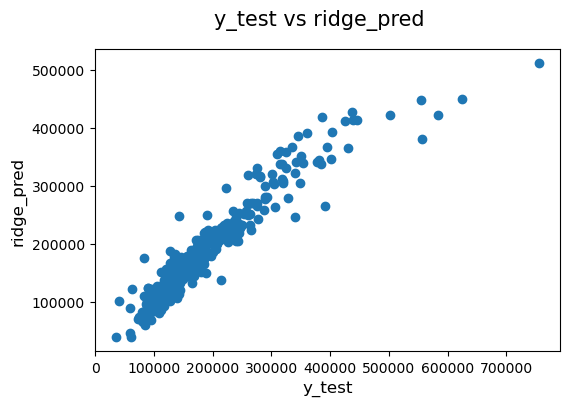

In [78]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=15)              
plt.xlabel('y_test', fontsize=12)                          
plt.ylabel('ridge_pred', fontsize=12)  
plt.show()

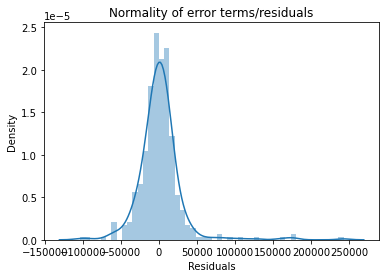

In [79]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [80]:
lasso_pred = lasso.predict(X_test)

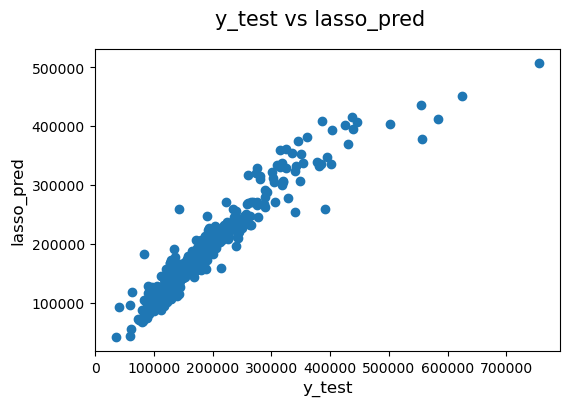

In [81]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=15)               
plt.xlabel('y_test', fontsize=12)                        
plt.ylabel('lasso_pred', fontsize=12)  
plt.show()

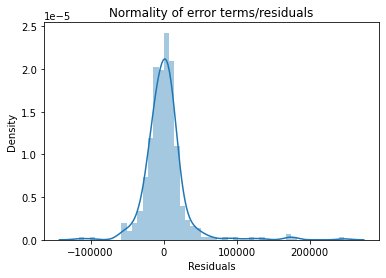

In [82]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [83]:
betas = pd.DataFrame(index=X_train.columns)

In [84]:
betas.rows = X_train.columns
betas.rows

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)

In [85]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [86]:
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso', ascending=False)

Linear         Ridge         Lasso
GrLivArea                  -6.713974e+16  49990.548526  1.697123e+05
OverallQual                 6.714233e+04  60090.241181  8.543278e+04
TotalBsmtSF                -9.578088e+15  30823.506312  4.272596e+04
Neighborhood_NridgHt        3.118662e+04  31179.878386  3.375901e+04
OverallCond                 3.445681e+04  31650.206106  3.290027e+04
BsmtFinSF1                  6.751865e+15  34604.652757  3.053536e+04
GarageArea                  3.424181e+04  28066.754893  2.947984e+04
Neighborhood_NoRidge        2.438141e+04  28400.100456  2.885337e+04
Neighborhood_StoneBr        2.929544e+04  26884.567465  2.037788e+04
BsmtExposure_Gd             1.571862e+04  18034.018085  2.011915e+04
SaleCondition_Partial       2.872588e+04  15286.697452  1.822794e+04
Neighborhood_Crawfor        1.837900e+04  17456.730003  1.662664e+04
TotRmsAbvGrd                3.229062e+04  35488.646617  1.629392e+04
Fireplaces                  1.967900e+04  22531.106434  1.545391e+04
MasVnrArea                  2.177780e+04  18512.628699  1.428351e+04
Exterior1st_BrkFace        -1.854625e+03  15176.717716  1.416064e+04
GarageCars                  1.960038e+04  21134.596378  1.332595e+04
Neighborhood_Somerst        4.005000e+02   6728.216344  1.251307e+04
WoodDeckSF                  1.333680e+04  15117.765026  1.135329e+04
Functional_Typ              1.234631e+04  12311.584039  1.098329e+04
Condition1_Norm             1.576900e+04  10091.277335  8.926190e+03
HalfBath                    6.862000e+03  10725.029067  8.723560e+03
BsmtFullBath                4.769125e+03   7442.282911  6.974216e+03
LotFrontage                 9.894146e+03   9322.844943  6.934138e+03
LotConfig_CulDSac           6.194625e+03   6161.843017  6.548655e+03
BsmtFinType1_GLQ            7.624750e+03   6756.757113  4.890246e+03
SaleCondition_Normal        7.823750e+03   7537.072745  4.834124e+03
MSZoning_RL                 2.938238e+04  10111.570086  4.296818e+03
Condition1_RRAn             1.911291e+04   9407.116573  4.244221e+03
BsmtFinType2_GLQ            8.680391e+02   7204.225017  3.265592e+03
LandContour_Lvl             9.874750e+03   9011.682053  3.042273e+03
Foundation_PConc            3.757500e+03   4360.995436  3.007440e+03
MSZoning_FV                 3.999994e+04  14126.019133  2.869539e+03
PavedDrive_Y               -2.774000e+03   1827.618684  2.678753e+03
Exterior2nd_Wd Sdng         2.513212e+04   8348.092717  2.647612e+03
MasVnrType_None             2.156250e+03   2558.884330  2.511902e+03
Fence_Not Available         9.426375e+03   7333.260793  2.041423e+03
Neighborhood_BrkSide       -1.407781e+03   -132.408675  2.010928e+03
Exterior2nd_VinylSd         1.935700e+04   4780.717182  1.977958e+03
ScreenPorch                 1.126233e+04   8414.053437  1.691429e+03
LotShape_IR2                8.512531e+03   7275.350929  1.662339e+03
BsmtCond_TA                 3.107125e+03   3585.218343  1.282924e+03
BsmtFinType1_BLQ            2.918375e+03   2149.956994  1.207775e+03
LotArea                     1.260801e+04   8304.863187  1.104040e+03
Fence_MnPrv                 9.857625e+03   7077.616881  9.904168e+02
CentralAir_Y                4.934500e+03   4532.627092  9.626872e+02
GarageType_Not Available    5.520851e+15   2356.895967  7.360971e+02
1stFlrSF                    4.335786e+16  51843.831788  3.228826e+02
Electrical_SBrkr            3.775000e+01   2031.380971  3.134452e+02
LandSlope_Mod               6.254500e+03   4889.285449  2.791384e+02
BsmtCond_Gd                 3.428562e+03   4648.941733  1.690821e+02
GarageQual_Not Available   -4.486564e+15   2356.895967  1.213061e+02
GarageCond_Not Available   -1.067253e+16   2356.895967  1.205011e-12
BsmtCond_Not Available     -6.403139e+15   -408.122317 -0.000000e+00
BsmtCond_Po                -5.551749e+14   2827.982777 -0.000000e+00
Heating_GasW                5.302625e+03   2937.164611  0.000000e+00
Exterior2nd_MetalSd         2.747500e+04   4303.255671  0.000000e+00
Exterior2nd_Other           3.59

In [87]:
final_metric

Metric  Linear Regression  RFE Regression  Ridge Regression-2  \
0  R2 Score (Train)       9.354266e-01    8.954946e-01        9.277295e-01   
1   R2 Score (Test)      -1.033055e+17    8.837348e-01        8.915019e-01   
2       RSS (Train)       3.146364e+11    5.092070e+11        3.521412e+11   
3        RSS (Test)       3.464502e+29    3.899124e+11        3.638644e+11   
4       MSE (Train)       1.805680e+04    2.297119e+04        1.910270e+04   
5        MSE (Test)       2.892812e+13    3.068905e+04        2.964624e+04   

   Lasso Regression-100  
0          9.186327e-01  
1          8.912258e-01  
2          3.964655e+11  
3          3.647905e+11  
4          2.026931e+04  
5          2.968394e+04

##### As pe above table linear regression is not working well, it is overfitting the model as R2 is good on test but poor on train datasert. Whereas Ridge and Lasso are very good on test and tarin data

In [88]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear         Ridge          Lasso
MSSubClass           -1.553466e+04 -16240.090613  -16551.455458
LotFrontage           9.894146e+03   9322.844943    6934.138418
LotArea               1.260801e+04   8304.863187    1104.040209
OverallQual           6.714233e+04  60090.241181   85432.778658
OverallCond           3.445681e+04  31650.206106   32900.267572
MasVnrArea            2.177780e+04  18512.628699   14283.507758
BsmtFinSF1            6.751865e+15  34604.652757   30535.360223
BsmtFinSF2            3.366970e+15   6351.392949       0.000000
BsmtUnfSF             6.432197e+15   6249.710243      -0.000000
TotalBsmtSF          -9.578088e+15  30823.506312   42725.961985
1stFlrSF              4.335786e+16  51843.831788     322.882647
2ndFlrSF              2.811148e+16  39432.814833       0.000000
GrLivArea            -6.713974e+16  49990.548526  169712.344081
BsmtFullBath          4.769125e+03   7442.282911    6974.215740
BsmtHalfBath         -2.859562e+03  -3179.678780      -0.000000
FullBath              5.901125e+03  11835.863677       0.000000
HalfBath              6.862000e+03  10725.029067    8723.560039
BedroomAbvGr         -3.330216e+04 -14868.417161   -2232.022918
KitchenAbvGr         -4.932125e+04 -19232.108257      -0.000000
TotRmsAbvGrd          3.229062e+04  35488.646617   16293.919130
Fireplaces            1.967900e+04  22531.106434   15453.911032
GarageYrBlt          -1.051438e+04  -3857.786447       0.000000
GarageCars            1.960038e+04  21134.596378   13325.952671
GarageArea            3.424181e+04  28066.754893   29479.842511
WoodDeckSF            1.333680e+04  15117.765026   11353.285860
OpenPorchSF           3.844688e+02   4980.444788       0.000000
EnclosedPorch         1.110831e+04   7222.364207       0.000000
ScreenPorch           1.126233e+04   8414.053437    1691.429000
MiscVal              -4.016195e+03  -2093.754958      -0.000000
Age_Prop             -4.111725e+04 -21424.336107  -14523.621590
MSZoning_FV           3.999994e+04  14126.019133    2869.539099
MSZoning_RH           2.934284e+04   6666.434718       0.000000
MSZoning_RL           2.938238e+04  10111.570086    4296.817899
MSZoning_RM           2.441156e+04   5173.209016   -3299.028500
Street_Pave           1.390398e+04  13138.075308       0.000000
Alley_Not Available  -2.535500e+03   -655.974471      -0.000000
Alley_Pave            9.912500e+02   2887.998371       0.000000
LotShape_IR2          8.512531e+03   7275.350929    1662.338724
LotShape_IR3          9.971570e+03  10391.771322       0.000000
LotShape_Reg          1.962125e+03   1286.594537      -0.000000
LandContour_HLS       5.354750e+03   5449.668865       0.000000
LandContour_Low       1.499781e+03   1519.411856       0.000000
LandContour_Lvl       9.874750e+03   9011.682053    3042.272830
Utilities_NoSeWa     -4.526959e+04 -11778.069614      -0.000000
LotConfig_CulDSac     6.194625e+03   6161.843017    6548.654515
LotConfig_FR2        -8.466750e+03  -9321.724606   -3512.213374
LotConfig_FR3         1.130348e+03   -142.036444      -0.000000
LotConfig_Inside     -1.775000e+03  -1654.350651    -258.002258
LandSlope_Mod         6.254500e+03   4889.285449     279.138404
LandSlope_Sev        -1.908329e+04  -1975.714072      -0.000000
Neighborhood_Blueste  1.162711e+04     12.415496       0.000000
Neighborhood_BrDale   4.490555e+03   2635.803839       0.000000
Neighborhood_BrkSide -1.407781e+03   -132.408675    2010.928271
Neighborhood_ClearCr -1.126909e+04  -6097.712001       0.000000
Neighborhood_CollgCr -6.466875e+03  -5713.679849      -0.000000
Neighborhood_Crawfor  1.837900e+04  17456.730003   16626.642443
Neighborhood_Edwards -1.909478e+04 -17559.718387   -9251.978414
Neighborhood_Gilbert -9.571875e+03 -10649.099671   -1530.558866
Neighborhood_IDOTRR  -9.741219e+03 -10085.439773   -2921.734273
Neighborhood_MeadowV -2.431375e+03  -5316.119123      -0.000000
Neighborhood_Mitchel -1.767920e+04 -15927.760845   -7904.979518
Neighborhood_NAmes   -1.650062e+04 -13886.813068   -8546.618

#### Part-2 Questions:

#### Checking Model by Increasing alpha value with double

#### 1. Ridge

In [89]:
alpha = 4
ridge4 = Ridge(alpha=alpha)
ridge4.fit(X_train, y_train)

Ridge(alpha=4)

In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge4.predict(X_train)
y_pred_test = ridge4.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

#Alpha 2
#R2score(train) 0.9277294745972668
#R2score(test)  0.8915019137941209

###R2score has decreased on training data and testing data

0.9222097346399525
0.8862435414650203
379036411835.56
381499137067.99286
392783846.4617202
921495500.1642339


#### 2. Lasso

In [91]:
alpha =200
lasso200 = Lasso(alpha=alpha)
lasso200.fit(X_train, y_train) 

Lasso(alpha=200)

In [92]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso200.predict(X_train)
y_pred_test = lasso200.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

#R2score at alpha-100
#0.9186327292619871
#0.0.8912257646336962

###R2score has decreased on training data and testing data


0.9048537576117922
0.874717723422264
463604155964.03
420152675459.944
480418814.4704974
1014861534.927401


In [93]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge-2'] = ridge.coef_
betas['Ridge-4'] = ridge4.coef_
betas['Lasso-100'] = lasso.coef_
betas['Lasso-200'] = lasso200.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

betas.sort_values('Lasso-200', ascending=False)

Linear       Ridge-2       Ridge-4  \
GrLivArea                  -6.713974e+16  49990.548526  42646.352874   
OverallQual                 6.714233e+04  60090.241181  53786.689331   
TotalBsmtSF                -9.578088e+15  30823.506312  29581.213695   
Neighborhood_NridgHt        3.118662e+04  31179.878386  30029.649092   
BsmtFinSF1                  6.751865e+15  34604.652757  32027.686130   
GarageArea                  3.424181e+04  28066.754893  26213.547025   
OverallCond                 3.445681e+04  31650.206106  29563.032329   
Neighborhood_NoRidge        2.438141e+04  28400.100456  27495.588541   
BsmtExposure_Gd             1.571862e+04  18034.018085  18457.004837   
TotRmsAbvGrd                3.229062e+04  35488.646617  33404.990580   
SaleCondition_Partial       2.872588e+04  15286.697452  12217.188905   
GarageCars                  1.960038e+04  21134.596378  21297.032689   
Fireplaces                  1.967900e+04  22531.106434  20543.236015   
Neighborhood_StoneBr        2.929544e+04  26884.567465  23906.975537   
Neighborhood_Crawfor        1.837900e+04  17456.730003  16446.342246   
Exterior1st_BrkFace        -1.854625e+03  15176.717716  14554.201580   
Neighborhood_Somerst        4.005000e+02   6728.216344   7420.415763   
HalfBath                    6.862000e+03  10725.029067  12323.571181   
Functional_Typ              1.234631e+04  12311.584039  11134.130811   
WoodDeckSF                  1.333680e+04  15117.765026  15200.340738   
Condition1_Norm             1.576900e+04  10091.277335   9904.415197   
MasVnrArea                  2.177780e+04  18512.628699  18192.141088   
BsmtFullBath                4.769125e+03   7442.282911   8378.810371   
BsmtFinType1_GLQ            7.624750e+03   6756.757113   6949.472274   
LotConfig_CulDSac           6.194625e+03   6161.843017   6416.844964   
Foundation_PConc            3.757500e+03   4360.995436   4357.678842   
Exterior2nd_VinylSd         1.935700e+04   4780.717182   4025.414507   
PavedDrive_Y               -2.774000e+03   1827.618684   2869.555507   
SaleCondition_Normal        7.823750e+03   7537.072745   7021.973936   
MSZoning_RL                 2.938238e+04  10111.570086   7737.778209   
LotFrontage                 9.894146e+03   9322.844943   9696.263382   
LandContour_Lvl             9.874750e+03   9011.682053   8298.717810   
CentralAir_Y                4.934500e+03   4532.627092   4645.118463   
BsmtFinType1_BLQ            2.918375e+03   2149.956994   2260.805622   
Fence_Not Available         9.426375e+03   7333.260793   6279.088006   
Neighborhood_BrkSide       -1.407781e+03   -132.408675    133.363711   
BsmtCond_TA                 3.107125e+03   3585.218343   3657.524837   
BsmtFinType1_LwQ           -2.369438e+03  -1090.427400   -892.097118   
Exterior2nd_ImStucc         2.349297e+03  -4308.646432  -2567.378681   
Exterior2nd_MetalSd         2.747500e+04   4303.255671   2567.740846   
BsmtFinType1_Not Available  9.712644e+15   -408.122317  -1351.898859   
Exterior2nd_Wd Sdng         2.513212e+04   8348.092717   7642.620627   
BsmtFinType1_Rec            1.713703e+03    143.728152     38.250529   
BsmtFinType1_Unf            3.075375e+03   1044.369273     50.694087   
BsmtFinType2_BLQ           -6.285562e+03  -2258.755468  -2337.774831   
Exterior2nd_HdBoard         9.543062e+03  -3312.499606  -2564.343722   
BsmtFinType2_LwQ           -9.453875e+03  -4211.423900  -3264.830400   
BsmtFinType2_Not Available -2.228717e+04  -4380.880776  -3185.067806   
BsmtFinType2_Rec           -4.080062e+03  -2656.779063  -2886.111702   
BsmtFinType2_Unf           -3.223625e+03   -326.796136   -505.614286   
Heating_GasA                7.538312e+03   1639.311850   1259.050205   
Heating_GasW                5.302625e+03   2937.164611   3054.200471   
BsmtFinType2_GLQ            8.680391e+02   7204.225017   6333.025981   
BsmtCond_Po                -5.551749e+14   2827.982777   1295.828350   
BsmtExposure_Not Available -4.250320e+03  -2458.546335  -2773.797969   
Bs

##### Important Predictor as per above model:
1. GrLivArea
2. OverallQual
3. TotalBsmtSF
4. Neighborhood_NridgHt
5. BsmtFinSF1

#### Buiding the model by removing 5 important featured identified in lasso model

In [94]:
X_train

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
493     0.000000     0.304348  0.170928     0.444444     0.571429    0.000000   
1037    0.235294     0.298137  0.204671     0.777778     0.428571    0.350753   
1197    0.323529     0.273292  0.194618     0.666667     0.571429    0.000000   
963     0.000000     0.627329  0.273831     0.888889     0.428571    0.000000   
540     0.000000     0.397516  0.342862     0.888889     0.428571    0.517272   
953     0.235294     0.298137  0.251972     0.444444     0.285714    0.205492   
764     0.588235     0.055901  0.212636     0.777778     0.428571    0.000000   
360     0.382353     0.298137  0.160850     0.555556     0.571429    0.000000   
1413    0.000000     0.416149  0.249884     0.777778     0.428571    0.324181   
1125    0.000000     0.242236  0.235449     0.333333     0.428571    0.000000   
651     0.294118     0.242236  0.200650     0.333333     0.428571    0.000000   
1101    0.000000     0.248447  0.218023     0.444444     0.428571    0.000000   
1211    0.176471     0.813665  0.279270     0.777778     0.714286    0.000000   
519     0.294118     0.198758  0.247925     0.666667     1.000000    0.000000   
1352    0.176471     0.180124  0.121153     0.555556     1.000000    0.000000   
709     0.000000     0.298137  0.151106     0.444444     0.714286    0.036315   
1208    0.000000     0.304348  0.166598     0.444444     0.714286    0.000000   
428     0.000000     0.267081  0.140795     0.666667     0.428571    0.095660   
907     0.176471     0.403727  0.262927     0.666667     0.714286    0.000000   
621     0.235294     0.428571  0.244883     0.555556     0.714286    0.000000   
355     0.000000     0.521739  0.256457     0.555556     0.428571    0.000000   
105     0.235294     0.335404  0.208151     0.777778     0.428571    0.680248   
344     0.823529     0.093168  0.033304     0.444444     0.142857    0.000000   
1363    0.235294     0.322981  0.185570     0.555556     0.428571    0.000000   
87      0.823529     0.118012  0.068335     0.555556     0.428571    0.067316   
137     0.411765     0.378882  0.251843     0.666667     0.428571    0.062002   
858     0.000000     0.366460  0.234572     0.666667     0.428571    0.167405   
13      0.000000     0.434783  0.241068     0.666667     0.428571    0.271036   
596     0.294118     0.242236  0.059288     0.555556     0.714286    0.000000   
181     0.294118     0.204969  0.162087     0.666667     0.571429    0.000000   
656     0.000000     0.316770  0.224442     0.444444     0.714286    0.047830   
1336    0.411765     0.409938  0.204825     0.444444     0.428571    0.499557   
282     0.588235     0.080745  0.097000     0.666667     0.428571    0.147033   
1048    0.000000     0.490683  0.527143     0.444444     0.285714    0.066430   
755     0.823529     0.080745  0.049750     0.555556     0.428571    0.791851   
743     0.352941     0.304348  0.298654     0.444444     0.571429    0.000000   
1203    0.000000     0.335404  0.217817     0.666667     0.428571    0.151461   
1246    0.235294     0.273292  0.175929     0.666667     0.428571    0.000000   
359     0.235294     0.354037  0.276099     0.777778     0.428571    0.469442   
382     0.235294     0.360248  0.204800     0.666667     0.428571    0.000000   
146     0.058824     0.186335  0.124246     0.444444     0.714286    0.000000   
411     1.000000     0.490683  0.859669     0.444444     0.428571    0.000000   
316     0.235294     0.453416  0.301722     0.666667     0.714286    0.246236   
1190    1.000000     0.298137  0.803294     0.333333     0.285714    0.131975   
1023    0.588235     0.136646  0.048513     0.666667     0.428571    0.012400   
149     0.176471     0.298137  0.127339     0.444444     0.285714    0.000000   
759     0.235294     0.273292  0.282441     0.777778     0.428571    0.454384   
936     0.000000     0.285714  0.226401     0.666667     0.428571    0.000000   
617     0.147059     0.236025  0.1527

In [95]:
y_train

493     155000
1037    287000
1197    144000
963     239000
540     315000
953     172000
764     270000
360     156000
1413    257000
1125    115000
651     108000
1101    119500
1211    164000
519     234000
1352    134900
709     109900
1208    140000
428     195400
907     250000
621     240000
355     177500
105     250000
344      85000
1363    156932
87      164500
137     171000
858     152000
13      279500
596     114504
181     200100
656     145500
1336    135000
282     207500
1048    115000
755     172500
743     175000
1203    213000
1246    186500
359     280000
382     213500
146     105000
411     145000
316     260000
1190    168000
1023    191000
149     115000
759     290000
936     184900
617     105500
147     222500
1278    237000
1127    259000
241     110500
1135    102000
296     152000
350     318061
1245    178000
439     110000
352      95000
657     149000
324     242000
1151    149900
583     325000
607     225000
1353    410000
792     269790
523     18

In [96]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)

In [97]:
betas.sort_values('Lasso-200',ascending=False)

Linear       Ridge-2       Ridge-4  \
GrLivArea                  -6.713974e+16  49990.548526  42646.352874   
OverallQual                 6.714233e+04  60090.241181  53786.689331   
TotalBsmtSF                -9.578088e+15  30823.506312  29581.213695   
Neighborhood_NridgHt        3.118662e+04  31179.878386  30029.649092   
BsmtFinSF1                  6.751865e+15  34604.652757  32027.686130   
GarageArea                  3.424181e+04  28066.754893  26213.547025   
OverallCond                 3.445681e+04  31650.206106  29563.032329   
Neighborhood_NoRidge        2.438141e+04  28400.100456  27495.588541   
BsmtExposure_Gd             1.571862e+04  18034.018085  18457.004837   
TotRmsAbvGrd                3.229062e+04  35488.646617  33404.990580   
SaleCondition_Partial       2.872588e+04  15286.697452  12217.188905   
GarageCars                  1.960038e+04  21134.596378  21297.032689   
Fireplaces                  1.967900e+04  22531.106434  20543.236015   
Neighborhood_StoneBr        2.929544e+04  26884.567465  23906.975537   
Neighborhood_Crawfor        1.837900e+04  17456.730003  16446.342246   
Exterior1st_BrkFace        -1.854625e+03  15176.717716  14554.201580   
Neighborhood_Somerst        4.005000e+02   6728.216344   7420.415763   
HalfBath                    6.862000e+03  10725.029067  12323.571181   
Functional_Typ              1.234631e+04  12311.584039  11134.130811   
WoodDeckSF                  1.333680e+04  15117.765026  15200.340738   
Condition1_Norm             1.576900e+04  10091.277335   9904.415197   
MasVnrArea                  2.177780e+04  18512.628699  18192.141088   
BsmtFullBath                4.769125e+03   7442.282911   8378.810371   
BsmtFinType1_GLQ            7.624750e+03   6756.757113   6949.472274   
LotConfig_CulDSac           6.194625e+03   6161.843017   6416.844964   
Foundation_PConc            3.757500e+03   4360.995436   4357.678842   
Exterior2nd_VinylSd         1.935700e+04   4780.717182   4025.414507   
PavedDrive_Y               -2.774000e+03   1827.618684   2869.555507   
SaleCondition_Normal        7.823750e+03   7537.072745   7021.973936   
MSZoning_RL                 2.938238e+04  10111.570086   7737.778209   
LotFrontage                 9.894146e+03   9322.844943   9696.263382   
LandContour_Lvl             9.874750e+03   9011.682053   8298.717810   
CentralAir_Y                4.934500e+03   4532.627092   4645.118463   
BsmtFinType1_BLQ            2.918375e+03   2149.956994   2260.805622   
Fence_Not Available         9.426375e+03   7333.260793   6279.088006   
Neighborhood_BrkSide       -1.407781e+03   -132.408675    133.363711   
BsmtCond_TA                 3.107125e+03   3585.218343   3657.524837   
BsmtFinType1_LwQ           -2.369438e+03  -1090.427400   -892.097118   
Exterior2nd_ImStucc         2.349297e+03  -4308.646432  -2567.378681   
Exterior2nd_MetalSd         2.747500e+04   4303.255671   2567.740846   
BsmtFinType1_Not Available  9.712644e+15   -408.122317  -1351.898859   
Exterior2nd_Wd Sdng         2.513212e+04   8348.092717   7642.620627   
BsmtFinType1_Rec            1.713703e+03    143.728152     38.250529   
BsmtFinType1_Unf            3.075375e+03   1044.369273     50.694087   
BsmtFinType2_BLQ           -6.285562e+03  -2258.755468  -2337.774831   
Exterior2nd_HdBoard         9.543062e+03  -3312.499606  -2564.343722   
BsmtFinType2_LwQ           -9.453875e+03  -4211.423900  -3264.830400   
BsmtFinType2_Not Available -2.228717e+04  -4380.880776  -3185.067806   
BsmtFinType2_Rec           -4.080062e+03  -2656.779063  -2886.111702   
BsmtFinType2_Unf           -3.223625e+03   -326.796136   -505.614286   
Heating_GasA                7.538312e+03   1639.311850   1259.050205   
Heating_GasW                5.302625e+03   2937.164611   3054.200471   
BsmtFinType2_GLQ            8.680391e+02   7204.225017   6333.025981   
BsmtCond_Po                -5.551749e+14   2827.982777   1295.828350   
BsmtExposure_Not Available -4.250320e+03  -2458.546335  -2773.797969   
Bs

##### Important Predictor as per above model Lasso-100:
1. GrLivArea
2. OverallQual
3. TotalBsmtSF
4. Neighborhood_NridgHt
5. OverallCond

In [98]:
X_train2=X_train.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_NridgHt', 'OverallCond'],axis=1)

X_test2=X_test.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_NridgHt', 'OverallCond'],axis=1)

In [99]:
alpha =100
lasso100 = Lasso(alpha=alpha)
lasso100.fit(X_train2, y_train) 

Lasso(alpha=100)

In [100]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso100.predict(X_train2)
y_pred_test = lasso100.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9054380617507017
0.8823611278510487
460757108930.4727
394519386314.02356
477468506.6637023
952945377.5701052


In [101]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso100'] = lasso100.coef_
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso100',ascending=False)

Lasso100
1stFlrSF                    141473.283899
2ndFlrSF                     79396.141250
BsmtFinSF1                   46165.756297
GarageArea                   44243.301048
MasVnrArea                   21875.419921
SaleCondition_Partial        21687.299900
BsmtExposure_Gd              20610.329533
Functional_Typ               19216.668390
Neighborhood_NoRidge         17981.872322
Fireplaces                   17764.584449
TotRmsAbvGrd                 14775.042490
Neighborhood_Crawfor         14194.633788
Exterior1st_BrkFace          13486.554318
BsmtUnfSF                    12817.614511
WoodDeckSF                   12595.588271
Neighborhood_StoneBr         12523.334565
LotFrontage                  12018.278240
Condition1_Norm              10714.797854
SaleCondition_Normal          7290.667368
HalfBath                      7275.530933
MSZoning_RL                   6774.663324
Exterior2nd_Wd Sdng           6544.820595
MSZoning_FV                   6499.333184
BsmtFinType1_GLQ              6446.103318
BsmtCond_TA                   5608.869431
LotConfig_CulDSac             5391.223965
BsmtFinSF2                    4867.517231
GarageCars                    4856.460906
BsmtCond_Gd                   4762.589109
CentralAir_Y                  4475.721130
BsmtFinType2_GLQ              4307.840521
Exterior2nd_VinylSd           3999.907836
BsmtFullBath                  3753.237925
Condition1_RRAn               3681.923836
Electrical_SBrkr              2911.034049
LandContour_Lvl               2828.430458
Foundation_PConc              2164.070246
LotShape_IR2                  2141.940722
Exterior1st_Stucco            1943.238265
GarageQual_Gd                 1829.268396
MasVnrType_Stone              1591.422085
Fence_Not Available           1547.543776
Fence_MnPrv                   1368.765540
Exterior2nd_MetalSd           1013.564354
BsmtFinType1_BLQ               901.962308
FireplaceQu_Gd                 800.964836
PavedDrive_Y                   795.135472
ScreenPorch                    746.072229
Exterior1st_VinylSd            495.697428
Exterior1st_MetalSd            408.847851
EnclosedPorch                  397.021076
GarageType_Attchd              286.022843
FullBath                       178.827164
BsmtFinType1_LwQ                 0.000000
Foundation_Wood                 -0.000000
BsmtFinType1_Not Available      -0.000000
BsmtFinType1_Rec                 0.000000
BsmtFinType1_Unf                 0.000000
BsmtExposure_Mn                  0.000000
BsmtFinType2_BLQ                -0.000000
SaleType_ConLw                   0.000000
SaleType_New                     0.000000
BsmtCond_Po                     -0.000000
SaleType_Oth                     0.000000
PavedDrive_P                    -0.000000
ExterCond_Fa                    -0.000000
Foundation_Stone                -0.000000
Foundation_CBlock               -0.000000
ExterCond_TA                     0.000000
ExterCond_Po                    -0.000000
BsmtFinType2_Not Available      -0.000000
MasVnrType_Not Available        -0.000000
SaleCondition_AdjLand            0.000000
MasVnrType_None                  0.000000
Exterior2nd_Wd Shng             -0.000000
SaleCondition_Alloca            -0.000000
Exterior2nd_Stucco               0.000000
Exterior2nd_Stone               -0.000000
Exterior2nd_Other                0.000000
Exterior2nd_ImStucc             -0.000000
Exterior2nd_HdBoard             -0.000000
BsmtFinType2_LwQ                -0.000000
Heating_GasA                     0.000000
BsmtFinType2_Rec                -0.000000
GarageType_CarPort              -0.000000
Functional_Sev                   0.000000
SaleType_CWD                     0.000000
FireplaceQu_Fa                  -0.000000
FireplaceQu_Po                  -0.000000
GarageType_Basment              -0.000000
GarageType_BuiltIn               0.000000
MiscFeature_Shed                -0.000000
GarageType_Not Available         0.000000
BsmtFinType2_Unf                 0.000000
GarageFinish_Not Available       0.000000
G

##### Important Predictor as per above model:

1. 1stFlrSF
2. 2ndFlrSF
3. BsmtFinSF1
4. GarageArea
5. MasVnrArea